In [ ]:
# Author        : David Darigan
# Student ID    : C00263218

Changelog

The following changes are listed from earliest to latest in descending order.


- Add Placeholder Cells for elements of the CRISP-DM Process
-----------
- Add required imports for the notebook
-----------
- Change #1

    Using the 'spam.csv' dataset of 5572 records and a KNN classifier considering the 3 closest neighbours

    ![Data Describe #1](initial_describe.png)

    The initial score evaluated to 0.93% which seems a little high.

    ![Accuracy #1](accuracy_1.png)

-----------
- Change #2

    Created a confusion matrix using the initial values

    ![Confusion Matrix #1](confusion_matrix_1.png)
    
    True Positive: 72

    True Negative: 961

    False Positive: 0

    False Negative: 82

----------
- Change #3

    Investigated the count of the values of 'ham' (not spam) and 'spam' in the initial dataset. The value ham/not spam significatly outweighs the value of spam which could be leading to significant bias.

    ![Dataset Count](dataset.png)

----------
- Change #4

    Split the original dataset into an equal frame of 50/50 values. This frame is almost 5 times less than the initial dataset.

    ![Dataset 2](dataset_2.png)

    This changed the accuracy to 74%~

    ![accuracy_2](accuracy_2.png)

    The confusion matrix was rerun on this new test

    ![confusion_matrix_2](confusion_matrix_2.png)

    The keypoint here is that both in this and the previous confusion matrix, that there are absolutely no positives. The actual negatives (not spam) is still about twice as much as the false negative, considering that the source dataset was split 50/50, this seems to indicate the initial model was suitable for this task.

In [ ]:
# CRISP-DM Steps

# Business Understanding
# Data Understanding
# Data Preparation
# Modelling
# Evaluation
# Deployment

In [14]:
# Primary Model Imports
from sklearn.neighbors import KNeighborsClassifier

# Common Imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt


# import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import numpy as np
import pandas as pd
import joblib

import pandas as pd

In [5]:
# Business Understanding


In [51]:
# Data Understanding

data = pd.read_csv("spam.csv")

# Creating a dataframe that is split 50/50 on ham/spam
total_spam = 747
small_ham_frame = (data[data['Category'] == 'ham']).head(total_spam)
spam_frame = data[data['Category'] == 'spam']
data = pd.concat([small_ham_frame,spam_frame])
data.describe()

,Category,Message
count,1494,1494
unique,2,1371
top,ham,"Sorry, I'll call later"
freq,747,6


In [52]:
# Data Preparation
X = data['Message']
y = data['Category']

# Convert text data into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)



In [53]:
# Modelling
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# Predict labels for the test set
predictions = knn_classifier.predict(X_test)


In [54]:
# Evaluation
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7391304347826086


In [12]:
# Deployment

['ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham'
 'ham' 'ham' 'spam' 'spam' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham'
 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'spam'
 'ham' 'ham' 'spam' 'ham' 'spam' 'ham' 'ham' 'ham' 'spam' 'ham' 'spam'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam'
 'spam' 'ham' 'spam' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'spam' 'spam'
 'spam' 'spam' 'spam' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'spam' 'spam' 'ham'
 'ham' 'ham' 'ham' 'spam' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 'spam' 'ham' 'ham' 'spam' 'ham' 'spam' 'spam' 'spam' 'ham' 'spam' 'ham'
 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham

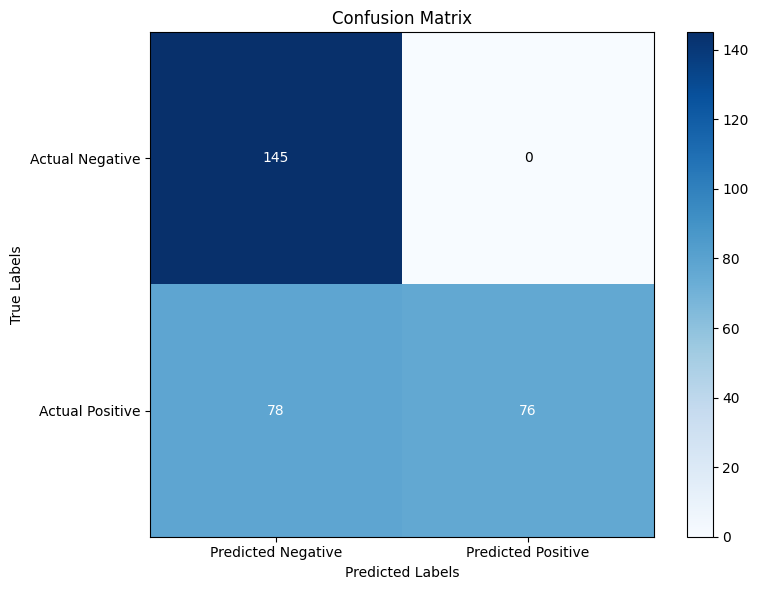

In [55]:

# # Confusion Matrix
print(predictions)

check = list(predictions)
word_counts = {word: check.count(word) for word in set(check)}

# Print word counts
for word, count in word_counts.items():
    print(f'{word}: {count}')

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0, 1], ['Actual Negative', 'Actual Positive'])

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()

plt.show()